#Algoritmos Genéticos

##Parte 3: Algoritmos genéticos para optimización de rutas de metro
###Descripción del problema:
Se desea encontrar la mejor combinación de estaciones para optimizar una ruta turística en metro, maximizando la cantidad de sitios visitados en un tiempo determinado.

###Tareas:
1. Representar una ruta en metro como un cromosoma (lista de estaciones en un orden
determinado).
2. Definir una función de aptitud basada en el tiempo de viaje y la cantidad de sitios
visitados.
3. Implementar un algoritmo genético con selección, cruza y mutación para encontrar
la mejor ruta.
4. Probar el algoritmo con un conjunto de 10 estaciones y analizar los resultados.


- Primero creamos el dataseed del grafo metro:
  1. El diccionario **dicctionaryValuesNode** tendrá como llave el nombre la estación y el contenido será la cantidad de sitios turísticos visitados.
  2. El diccionario **dictionaryConexionStations** tendrá como llave el nombre la estación y el contenido serán listas compuesas de un string y un int, el string corresponde al nombre de la estación con la que está conectado y el int el costo de camino por moverse a esta estación, el cuál consideramos como un tiempo en minutos.

- También establecemos un modelo integrado por 10 estaciones, vamos a considerar que la conexión entre estaciones debe ser inmediata, por lo que la estación en la posición [0] del arreglo debe tener conexión inmediata con la estación en la posición [1] y así sucesivamente.

- Se fijará un tiempo máximo de viaje en función de la cantidad de estaciones del individuo

In [203]:
import random

#modelo = ["Bellas_artes","Garibaldi","Guerrero","Hidalgo","Balderas"] #Objetivo
modelo = ["Bellas_artes","Garibaldi","Guerrero","Hidalgo","Balderas","Salto_del_agua","Pino_suarez","Candelaria","Morelos","San_Lazaro"] #Objetivo

largo = 10 #La longitud del material genetico de cada individuo, o cantidad de estaciones recorridas
num = 20 #La cantidad de individuos que habra en la poblacion
pressure = 4 #Cuantos individuos se seleccionan para reproduccion. Necesariamente mayor que 2
mutation_chance = 0.4 #La probabilidad de que un individuo mute
max_time_viaje = largo * 4 #minutos

#Key -> Nombre de la estacion : Value -> Cantidad de sitios visitados
dicctionaryValuesNode = {
  "Pantitlan":0,
  "El_rosario":1,
  "Instituto_del_petroleo":6,
  "Deportivo_18_de_Marzo":6,
  "La_Raza":6,
  "Martin_Carrera":5,
  "Consulado":4,
  "Tacuba":10,
  "Oceania":2,
  "Guerrero":10,
  "Garibaldi":10,
  "Hidalgo":10,
  "Bellas_artes":10,
  "Morelos":5,
  "San_Lazaro":5,
  "Balderas":8,
  "Salto_del_agua":7,
  "Pino_suarez":6,
  "Candelaria":5,
  "Tacubaya":10,
  "CentroMedico":7,
  "Chabacano":5,
  "Jamaica":4,
  "Santa_Anita":4,
  "Mixcoac":1,
  "Zapata":7,
  "Ermita":6,
  "Atlalilco":6,
  "Universidad":1,
  "La_Villa_Basilica":1
}

#Key -> Nombre de la estacion : Value -> ["Estacion Transborde", costo por moverse a esa estacion]
dictionaryConexionStations = {
  "Pantitlan":[["Oceania",6],["San_Lazaro",12],["Jamaica",10]],
  "El_rosario":[["Tacuba",6],["Instituto_del_petroleo",12]],
  "Instituto_del_petroleo":[["El_rosario",12],["La_Raza",4],["Deportivo_18_de_Marzo",4]],
  "Deportivo_18_de_Marzo":[["Instituto_del_petroleo",4],["La_Raza",4],["La_Villa_Basilica",2]],
  "La_Raza":[["Instituto_del_petroleo",4],["Deportivo_18_de_Marzo",4],["Consulado",6],["Guerrero",4]],
  "Martin_Carrera":[["La_Villa_Basilica",2],["Consulado",6]],
  "Consulado":[["Martin_Carrera",6],["La_Raza",6],["Morelos",4],["Oceania",6]],
  "Tacuba":[["El_rosario",6],["Tacubaya",10],["Hidalgo",14]],
  "Oceania":[["Consulado",6],["San_Lazaro",6],["Pantitlan",6]],
  "Guerrero":[["La_Raza",4],["Garibaldi",2],["Hidalgo",2]],
  "Garibaldi":[["Guerrero",2],["Bellas_artes",2],["Morelos",6]],
  "Hidalgo":[["Guerrero",2],["Bellas_artes",2],["Balderas",4],["Tacuba",14]],
  "Bellas_artes":[["Garibaldi",2],["Hidalgo",2],["Salto_del_agua",4],["Pino_suarez",6]],
  "Morelos":[["Consulado",4],["Garibaldi",6],["Candelaria",2],["San_Lazaro",2]],
  "San_Lazaro":[["Morelos",2],["Candelaria",2],["Pantitlan",12],["Oceania",6]],
  "Balderas":[["Hidalgo",4],["Tacubaya",12],["CentroMedico",6],["Salto_del_agua",2]],
  "Salto_del_agua":[["Bellas_artes",4],["Balderas",2],["Chabacano",6],["Pino_suarez",4]],
  "Pino_suarez":[["Bellas_artes",6],["Salto_del_agua",4],["Chabacano",4],["Candelaria",4]],
  "Candelaria":[["Morelos",2],["Pino_suarez",4],["Jamaica",4],["San_Lazaro",2]],
  "Tacubaya":[["Tacuba",10],["Mixcoac",6],["CentroMedico",6],["Balderas",12]],
  "CentroMedico":[["Balderas",6],["Tacubaya",6],["Zapata",8],["Chabacano",4]],
  "Chabacano":[["Pino_suarez",4],["Salto_del_agua",6],["CentroMedico",4],["Ermita",12],["Santa_Anita",4],["Jamaica",2]],
  "Jamaica":[["Candelaria",4],["Chabacano",2],["Santa_Anita",2],["Pantitlan",10]],
  "Santa_Anita":[["Jamaica",2],["Chabacano",4],["Atlalilco",12]],
  "Mixcoac":[["Tacubaya",6],["Zapata",6]],
  "Zapata":[["CentroMedico",8],["Mixcoac",6],["Universidad",10],["Ermita",6]],
  "Ermita":[["Zapata",6],["Chabacano",12],["Atlalilco",4]],
  "Atlalilco":[["Ermita",4],["Santa_Anita",12]],
  "Universidad":[["Zapata",10]],
  "La_Villa_Basilica":[["Deportivo_18_de_Marzo",2],["Martin_Carrera",2]]
}

##Antes de continuar con el algoritmo vamos a crear un grafo con el dataseed que establecimos para visualizar de manera clara la estructura del árbol:

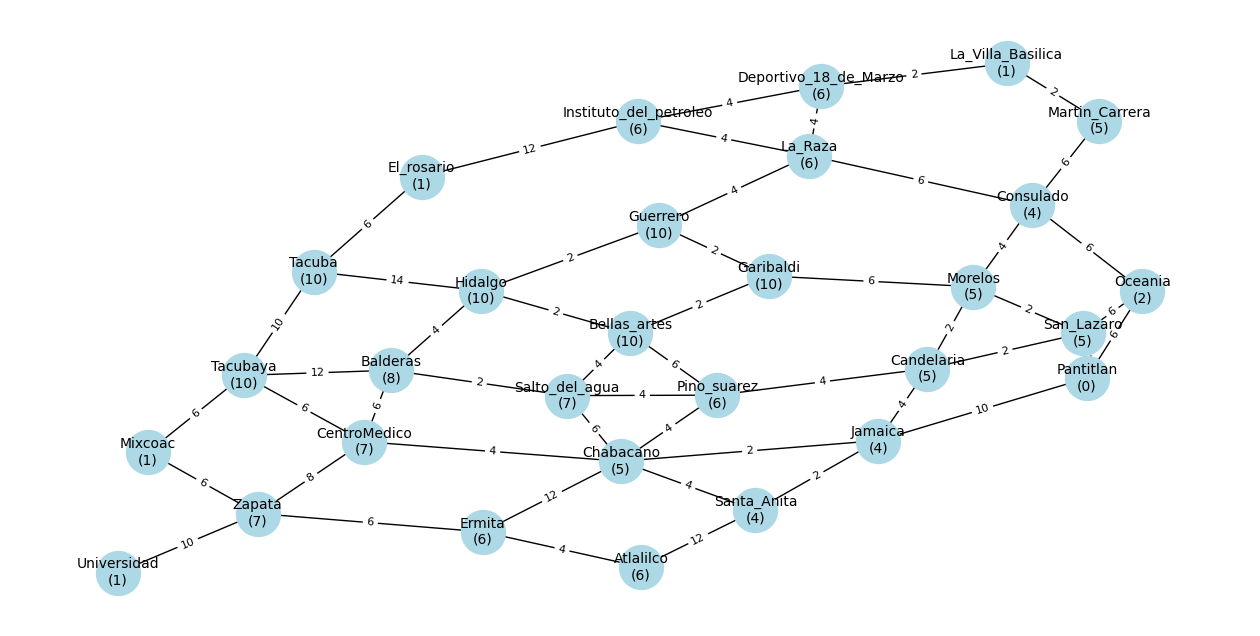

In [204]:
# Creamos un grafo para visualizar la dataseed
import networkx as nx
import matplotlib.pyplot as plt

def crear_grafo_metro(dictionaryConexionStations, dicctionaryValuesNode):
  grafo = nx.Graph()

  for estacion, sitios_visitados in dicctionaryValuesNode.items():
    grafo.add_node(estacion, sitios_visitados=sitios_visitados)

  for estacion, conexiones in dictionaryConexionStations.items():
    for conexion in conexiones:
      estacion_destino, costo = conexion
      grafo.add_edge(estacion, estacion_destino, costo=costo)

  return grafo

grafo_metro = crear_grafo_metro(dictionaryConexionStations, dicctionaryValuesNode)
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
pos = nx.spring_layout(grafo_metro)
labels_aristas = nx.get_edge_attributes(grafo_metro, 'costo')
labels_nodos = {nodo: f"{nodo}\n({grafo_metro.nodes[nodo]['sitios_visitados']})" for nodo in grafo_metro.nodes}

nx.draw(grafo_metro, with_labels=False, node_color='lightblue', node_size=1000, pos=pos, ax=ax)
nx.draw_networkx_labels(grafo_metro, pos, labels=labels_nodos, font_size=10)
nx.draw_networkx_edge_labels(grafo_metro, pos, edge_labels=labels_aristas, font_size=8)

plt.show()

##Se crea la función individual, la cuál devolverá una lista de estaciones de manera alreatoria, la única restricción es que no pueden repetirse estaciones dentro del individuo, el tamaño del arreglo está dado por el valor de **largo** (que corresponde con la cantidad de metrial genético de cada individuo), para esta prueba se estableció un material genético de **10** estaciones

In [205]:
def individual():
    """
        Crea un individuo compuesto por una lista de
        estaciones de metro no repetidas
    """
    individuo = []
    while len(individuo) < largo:
      estacion = random.choice(list(dicctionaryValuesNode.keys()))
      if estacion not in individuo:
        individuo.append(estacion)

    return individuo

###A continuación probamos la función **individual()** creando 10 individuos, cómo se puede observar cada individuo tiene 10 estaciones diferentes que no necesariemente tienen conexión directa entre ellas

In [206]:
# Test de la funcion individual
for i in range(10):
  individuo = individual()
  print(individuo)

['Garibaldi', 'La_Villa_Basilica', 'San_Lazaro', 'El_rosario', 'Hidalgo', 'Bellas_artes', 'Instituto_del_petroleo', 'Balderas', 'Martin_Carrera', 'Pino_suarez']
['Santa_Anita', 'Tacuba', 'Bellas_artes', 'Mixcoac', 'Garibaldi', 'Ermita', 'Oceania', 'Atlalilco', 'Chabacano', 'Balderas']
['Universidad', 'San_Lazaro', 'El_rosario', 'Mixcoac', 'Pantitlan', 'Balderas', 'Atlalilco', 'Zapata', 'Martin_Carrera', 'Pino_suarez']
['Mixcoac', 'Hidalgo', 'San_Lazaro', 'Pino_suarez', 'Instituto_del_petroleo', 'Tacubaya', 'Salto_del_agua', 'La_Villa_Basilica', 'Garibaldi', 'Consulado']
['Guerrero', 'Pino_suarez', 'CentroMedico', 'San_Lazaro', 'Garibaldi', 'Martin_Carrera', 'Pantitlan', 'La_Raza', 'Bellas_artes', 'Santa_Anita']
['Martin_Carrera', 'Tacubaya', 'Universidad', 'Pino_suarez', 'El_rosario', 'Candelaria', 'Salto_del_agua', 'Consulado', 'Jamaica', 'Zapata']
['Ermita', 'Balderas', 'Consulado', 'Jamaica', 'Mixcoac', 'Martin_Carrera', 'Bellas_artes', 'Garibaldi', 'Guerrero', 'Pino_suarez']
['Zapa

##Ahora creamos la función **crearPoblacion()** la cuál devuelve un arreglo de individuos creados con la función individual. La longitud de esta arreglo (tamaño de la población) está dada por la variable **num**, para este caso definimos una población de 20

In [207]:
def crearPoblacion():
    """
        Crea una poblacion nueva de individuos
    """
    return [individual() for i in range(num)]

##Definimos la función **obtener_tiempo_viaje()** encargada de regresar el tiempo de viaje entre dos estaciones, regresa el valor asociado al costo de camino entre dos estaciones, si no existe conexión definida, supondremos un costo *infinito* que se penalizará después, si las dos estaciones dadas son la misma, entonces el costo es de 0, puesto que no debe trasladarse

In [208]:
# Función para obtener el tiempo de viaje entre dos estaciones
def obtener_tiempo_viaje(estacion1, estacion2):
  """
      Regresa el costo entre moverse de una estación a otra
  """
  if(estacion1 == estacion2): # Si te mueves a la misma estación
    return 0

  if estacion1 in dictionaryConexionStations:
    for conexion in dictionaryConexionStations[estacion1]:
      if conexion[0] == estacion2:
        return conexion[1]

  return float("inf") #Si no existe conexión declarada, entonces se supone un costo "infinito"

### Probamos la función crearPoblacion() y la función obtener_tiempo_viaje()

In [209]:
# Creamos una poblacion
miPoblacion = crearPoblacion()
#Test funcion "obtener_tiempo_viaje"
unIndividuo = miPoblacion[0] # Guardamos en una variable la información de un indiviudo de la población
tiempo_total_viaje = 0
print(unIndividuo)
for i in range(len(unIndividuo)-1): # Para el individuo almacenado calculamos el tiempo de viaje entre cada una de las estaciones
  tiempo_viaje = obtener_tiempo_viaje(unIndividuo[i],unIndividuo[i+1])
  tiempo_total_viaje += tiempo_viaje
  print(f"Tiempo entre la estacion {unIndividuo[i]} y {unIndividuo[i+1]} {tiempo_viaje}")
print(f"Tiempo total de viaje: {tiempo_total_viaje}")

['Pantitlan', 'Balderas', 'Consulado', 'Deportivo_18_de_Marzo', 'Mixcoac', 'Atlalilco', 'Guerrero', 'Oceania', 'Pino_suarez', 'Tacuba']
Tiempo entre la estacion Pantitlan y Balderas inf
Tiempo entre la estacion Balderas y Consulado inf
Tiempo entre la estacion Consulado y Deportivo_18_de_Marzo inf
Tiempo entre la estacion Deportivo_18_de_Marzo y Mixcoac inf
Tiempo entre la estacion Mixcoac y Atlalilco inf
Tiempo entre la estacion Atlalilco y Guerrero inf
Tiempo entre la estacion Guerrero y Oceania inf
Tiempo entre la estacion Oceania y Pino_suarez inf
Tiempo entre la estacion Pino_suarez y Tacuba inf
Tiempo total de viaje: inf


In [210]:
"""
  Recibe un individuo y retorna True si el individuo tiene
  estaciones repetidas, False en caso contrario
"""
def check_duplicidad(individuo):
  if(len(set(individuo)) < largo):
    return True
  else:
    return False

## La función **verificar_y_reordenar_individuo()** nos ayudará para mostrar apropiadamente (en un orden de conexiones correcto) el individuo final

In [211]:
def verificar_y_reordenar_individuo(individuo, diccionario_conexiones):
  """
  Recibe un array de estaciones y verifica si cada estación está conectada
  con la siguiente.

  Si el orden original es correcto, retorna (True, individuo).
  Si no lo es, intenta reordenar la lista
  """
  def es_valido(array_estaciones):
    for i in range(len(array_estaciones) - 1):
      estacion_actual = array_estaciones[i]
      estacion_siguiente = array_estaciones[i + 1]

      if estacion_actual == estacion_siguiente: # Si ambas estaciones son iguales diremos que están conectadas.
        continue

      conexiones = diccionario_conexiones.get(estacion_actual, [])# Obtenemos la lista de conexiones de la estación actual
      conexion_encontrada = False
      for conexion in conexiones:
        if conexion[0] == estacion_siguiente: # Si se encontro conexion inmediatamente
          conexion_encontrada = True
          break  # Salimos del ciclo ya que se encontro conexion

      if not conexion_encontrada:# El orden no es correcto, regresa False
        return False

    return True # El orden es válido, regresa True

  def buscar_orden_valido(array_ordenado, array_desordenado):
    if not array_desordenado:# Si ya no hay estaciones por ordenar
      if es_valido(array_ordenado): # Si array ordenado es correcto, lo regresamos
        return array_ordenado
      else:
        return None

    for i in range(len(array_desordenado)):
      estacion = array_desordenado[i]

      if not array_ordenado:
        nueva_ruta = buscar_orden_valido([estacion], array_desordenado[:i] + array_desordenado[i+1:])
        if nueva_ruta != None:
          return nueva_ruta
      else:
        # Verificamos si la última estación en la ruta tiene conexión con la estación actual
        conexiones = diccionario_conexiones.get(array_ordenado[-1], [])
        if any(conexion[0] == estacion for conexion in conexiones):
          nueva_ruta = buscar_orden_valido(array_ordenado + [estacion], array_desordenado[:i] + array_desordenado[i+1:])
          if nueva_ruta is not None:
            return nueva_ruta

    return None # Si ninguna opción genera un orden válido, retornamos None


  # Antes que nada verficamos si el orden original del individuo es válido.
  if es_valido(individuo):
    return True, individuo

  # Si no, intentamos reordenar todo el individuo.
  nuevo_individuo = buscar_orden_valido([], individuo)
  if nuevo_individuo != None:
    return True, nuevo_individuo
  else:
    return False, individuo

## La función **calcularFitness()** regresará una ponderación de rendimiento **fitness**, **tiempo total de viaje** y **número de sitios visitados**. La ponderación depende de:
- Tiempo total de viaje entre estaciones
- Sitios visitados en total
- Si el tiempo total no excede el máximo establecido
- Que tan parecido es el individuo con el modelo establecido al inicio

In [212]:
def calcularFitness(individual):
  """
      Calcula el fitness de un individuo
  """
  tiempo_total = 0
  sitios_visitados = 0
  fitness = 1
  estaciones_visitadas = []

  for i in range(len(individual)): #Si el individuo se parece al modelo aumenta el fitness
    if individual[i] == modelo[i]:
      fitness *= 1.15
  #print(f"Fitness despues de comparar con modelo {fitness}")

  #Calculamos el fitness en funcion del tiempo de viaje y sitios visitados
  for i in range(len(individual)-1):
    tiempoViaje = obtener_tiempo_viaje(individual[i],individual[i+1])
    #print(f"Tiempo entre la estacion {individual[i]} y {individual[i+1]} {tiempoViaje}")
    if tiempoViaje == float("inf"): #En caso de que no exista conexion directa entre estaciones, se penaliza con un tiempo 25 minutos
      tiempoViaje = 25
    tiempo_total += tiempoViaje
    #print(f"Tiempo total de viaje in for: {tiempo_total}")

  for estacion in individual:
    if estacion not in estaciones_visitadas: #Si la estación aún no ha sido visitada, agregamos la cantidad de sitios visitados
      sitios_visitados += dicctionaryValuesNode.get(estacion,0) #Se obtienen los sitios visitados en total para cada individuo
      estaciones_visitadas.append(estacion)

  fitness *= sitios_visitados*0.8
  #print(f"Fitness despues de sitios vistados {fitness}")

  fitness -= tiempo_total*0.1
  #print(f"Fitness despues de tiempo total {fitness}")

  #Penalizaciones
  if(tiempo_total > max_time_viaje): #Si el tiempo total de viaje ha superado el tiempo maximo establecido, se penaliza el fitness
    fitness *= 0.75
  #print(f"Fitness despues de evaluar max time viaje {fitness}")

  if check_duplicidad(individual): #Si el individuo tiene estaciones repetidas disminuye el fitness
    fitness = fitness / 2

  #print(f"Fitness despues de ver repetidos {fitness}")

  return round(fitness,3), tiempo_total, sitios_visitados

In [213]:
"""
  Recibe una población y regresa el promedio de fitness de todos los
  individuos de la población
"""
def averageFitnessPoblacion(poblacion):
  averageFitness_poblacion = 0
  for i in range(len(poblacion)):
    averageFitness_poblacion += calcularFitness(poblacion[i])[0]

  #print(averageFitness_poblacion)
  #print(len(poblacion))
  return averageFitness_poblacion / len(poblacion)

In [214]:
#Test de la fución calcularFitness()
for individuo in miPoblacion:
  print(f"Fit: {calcularFitness(individuo)[0]} \tIndividuo: {individuo}")

Fit: 14.925 	Individuo: ['Pantitlan', 'Balderas', 'Consulado', 'Deportivo_18_de_Marzo', 'Mixcoac', 'Atlalilco', 'Guerrero', 'Oceania', 'Pino_suarez', 'Tacuba']
Fit: 23.145 	Individuo: ['Instituto_del_petroleo', 'Garibaldi', 'Balderas', 'Universidad', 'Tacuba', 'Morelos', 'Santa_Anita', 'CentroMedico', 'La_Villa_Basilica', 'La_Raza']
Fit: 22.125 	Individuo: ['Martin_Carrera', 'Deportivo_18_de_Marzo', 'El_rosario', 'Tacuba', 'San_Lazaro', 'Guerrero', 'La_Villa_Basilica', 'Garibaldi', 'CentroMedico', 'Chabacano']
Fit: 26.985 	Individuo: ['Bellas_artes', 'Pino_suarez', 'Garibaldi', 'Candelaria', 'Hidalgo', 'Santa_Anita', 'Jamaica', 'Balderas', 'El_rosario', 'La_Villa_Basilica']
Fit: 15.45 	Individuo: ['El_rosario', 'Pantitlan', 'Ermita', 'Jamaica', 'San_Lazaro', 'Tacuba', 'Tacubaya', 'Chabacano', 'Instituto_del_petroleo', 'Martin_Carrera']
Fit: 16.35 	Individuo: ['La_Raza', 'Oceania', 'San_Lazaro', 'Candelaria', 'Universidad', 'Zapata', 'Ermita', 'La_Villa_Basilica', 'Deportivo_18_de_Marzo

In [215]:
#Test de la función averageFitnessPoblacion()
averageFitnessPoblacion(miPoblacion)

22.198500000000003

## Se declara la función **selection_and_reproduction()** encargada de calcular el fitness para cada individuo y ordenarlo de acurdo a su puntaje, para posteriormente mezaclar el material genético de los individuos mejor puntuados, devuelve el nuevo arrglo de individuos

In [216]:
def selection_and_reproduction(population):
    """
        Puntua todos los elementos de la poblacion (population) y se queda con los mejores
        guardandolos dentro de 'selected'.
        Despues mezcla el material genetico de los elegidos para crear nuevos individuos y
        llenar la poblacion.
    """
    puntuados = [ (calcularFitness(i)[0], i) for i in population] #Calcula el fitness de cada individuo, y lo guarda en pares ordenados de la forma (fitness , ["estacion","estacion","estacion"])
    puntuados = [i[1] for i in sorted(puntuados)] #Ordena los pares ordenados y se queda solo con el array de valores

    population = puntuados
    selected =  puntuados[(len(puntuados)-pressure):] #Esta linea selecciona los 'n' individuos del final, donde n viene dado por 'pressure'

    #Se mezcla el material genetico para crear nuevos individuos
    for i in range(len(population)-pressure):
      punto = random.randint(1,largo-1) #Se elige un punto para hacer el intercambio
      padre = random.sample(selected, 2) #Se eligen dos padres

      population[i][:punto] = padre[0][:punto] #Se mezcla el material genetico de los padres en cada nuevo individuo
      population[i][punto:] = padre[1][punto:]

      #print(f"Individuo creado tras reproduccion: {population[i]}")

    return population #El array 'population' tiene ahora una nueva poblacion de individuos, que se devuelven

In [221]:
#Test selection_and_reproduction()
other_poblacion = crearPoblacion()
for i in range(5):
  print(selection_and_reproduction(other_poblacion))

[['Jamaica', 'Salto_del_agua', 'Zapata', 'Ermita', 'Hidalgo', 'Tacubaya', 'Mixcoac', 'Tacuba', 'Consulado', 'Morelos'], ['Tacubaya', 'Martin_Carrera', 'Guerrero', 'Tacuba', 'Oceania', 'Balderas', 'Garibaldi', 'El_rosario', 'Hidalgo', 'Guerrero'], ['Deportivo_18_de_Marzo', 'Instituto_del_petroleo', 'Zapata', 'Ermita', 'Hidalgo', 'Tacubaya', 'Mixcoac', 'El_rosario', 'Hidalgo', 'Deportivo_18_de_Marzo'], ['Tacubaya', 'Martin_Carrera', 'Guerrero', 'Tacuba', 'Oceania', 'Balderas', 'Garibaldi', 'Atlalilco', 'Morelos', 'Bellas_artes'], ['Garibaldi', 'Consulado', 'Tacubaya', 'Pantitlan', 'Zapata', 'Universidad', 'Tacubaya', 'Zapata', 'Hidalgo', 'Guerrero'], ['Jamaica', 'Salto_del_agua', 'Candelaria', 'Consulado', 'Bellas_artes', 'Universidad', 'Tacubaya', 'Zapata', 'Consulado', 'Morelos'], ['Deportivo_18_de_Marzo', 'Instituto_del_petroleo', 'Zapata', 'Ermita', 'Hidalgo', 'Tacubaya', 'Guerrero', 'Atlalilco', 'Morelos', 'Bellas_artes'], ['Jamaica', 'Salto_del_agua', 'Candelaria', 'Tacuba', 'Ocean

## La función mutation() se encargara de mutar de manera aleatoria a los individuos de una población, la probabilidad de mutar esta dada por **mutation_chance**. El individuo muta seleccionando una estación al azar y cambiando su valor

In [222]:
def mutation(population):
    """
        Se mutan los individuos al azar.
    """
    for i in range(len(population)-pressure):
      if random.random() <= mutation_chance: #Cada individuo de la poblacion (menos los padres) tienen una probabilidad de mutar
        punto = random.randint(0,largo-1) #Se elgie un punto al azar
        nuevo_valor = random.choice(list(dicctionaryValuesNode.keys()))  #y un nuevo valor para este punto

        #Es importante mirar que el nuevo valor no sea igual al viejo
        while nuevo_valor == population[i][punto]:
            nuevo_valor = random.choice(list(dicctionaryValuesNode.keys()))

        #Se aplica la mutacion
        population[i][punto] = nuevo_valor
        #print(f"Individuo mutado: {population[i]}")
    return population

In [227]:
#Test mutation()
other_poblacion = crearPoblacion()
for i in range(5):
  print(mutation(other_poblacion))

[['La_Raza', 'Atlalilco', 'Bellas_artes', 'Tacuba', 'Mixcoac', 'Jamaica', 'San_Lazaro', 'Martin_Carrera', 'Pino_suarez', 'El_rosario'], ['Oceania', 'Hidalgo', 'Candelaria', 'CentroMedico', 'Tacubaya', 'Ermita', 'Jamaica', 'La_Raza', 'La_Villa_Basilica', 'Chabacano'], ['Santa_Anita', 'La_Raza', 'Universidad', 'Oceania', 'San_Lazaro', 'Pantitlan', 'Hidalgo', 'La_Villa_Basilica', 'Consulado', 'Zapata'], ['Pantitlan', 'El_rosario', 'San_Lazaro', 'La_Villa_Basilica', 'Candelaria', 'Bellas_artes', 'Oceania', 'Hidalgo', 'Morelos', 'Guerrero'], ['Jamaica', 'Morelos', 'Chabacano', 'Hidalgo', 'El_rosario', 'Garibaldi', 'Consulado', 'Guerrero', 'Santa_Anita', 'La_Raza'], ['La_Villa_Basilica', 'Balderas', 'Consulado', 'Hidalgo', 'Mixcoac', 'Santa_Anita', 'La_Raza', 'El_rosario', 'Salto_del_agua', 'Zapata'], ['Tacubaya', 'Guerrero', 'Jamaica', 'Oceania', 'San_Lazaro', 'Deportivo_18_de_Marzo', 'Chabacano', 'Garibaldi', 'La_Raza', 'Candelaria'], ['Hidalgo', 'Atlalilco', 'Martin_Carrera', 'Chabacano',

Poblacion Inicial:
[['Tacuba', 'El_rosario', 'Garibaldi', 'Salto_del_agua', 'Pantitlan', 'La_Villa_Basilica', 'Instituto_del_petroleo', 'Santa_Anita', 'Atlalilco', 'Pino_suarez'], ['El_rosario', 'Martin_Carrera', 'Ermita', 'Oceania', 'Balderas', 'Mixcoac', 'Santa_Anita', 'CentroMedico', 'Consulado', 'Hidalgo'], ['Garibaldi', 'San_Lazaro', 'Instituto_del_petroleo', 'Balderas', 'Tacubaya', 'Deportivo_18_de_Marzo', 'Martin_Carrera', 'Hidalgo', 'Tacuba', 'La_Raza'], ['Tacubaya', 'Universidad', 'Guerrero', 'Bellas_artes', 'Martin_Carrera', 'Tacuba', 'Salto_del_agua', 'Jamaica', 'La_Raza', 'Balderas'], ['El_rosario', 'Salto_del_agua', 'La_Raza', 'Guerrero', 'Chabacano', 'Garibaldi', 'Santa_Anita', 'Oceania', 'Deportivo_18_de_Marzo', 'Mixcoac'], ['Jamaica', 'Chabacano', 'Pantitlan', 'Consulado', 'Guerrero', 'Mixcoac', 'El_rosario', 'Universidad', 'Oceania', 'Candelaria'], ['El_rosario', 'La_Raza', 'La_Villa_Basilica', 'Hidalgo', 'Tacuba', 'Balderas', 'Martin_Carrera', 'Santa_Anita', 'Jamaica'

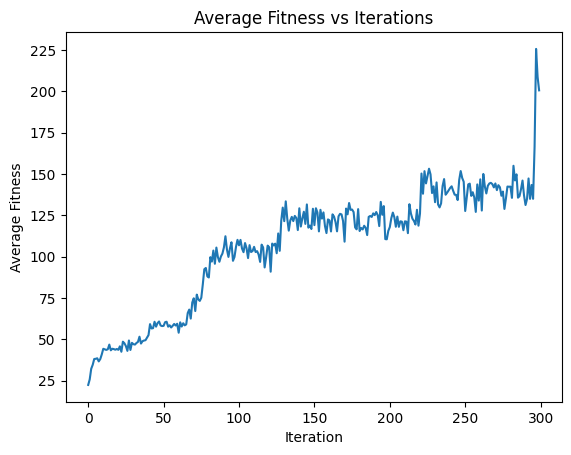

In [228]:
import matplotlib.pyplot as plt

population = crearPoblacion()#Inicializar una poblacion
evoluciones = 300
averageFitness = []
print("Poblacion Inicial:\n%s"%(population)) #Se muestra la poblacion inicial
#for i in range(len(population)):
#  print(f"Fitness: {calcularFitness(population[i])} \tIndividuo: {population[i]}")

#Se evoluciona la poblacion
for i in range(evoluciones):
  averageFitness.append(averageFitnessPoblacion(population))
  population = selection_and_reproduction(population)
  #print("\nPoblacion Reproducida:\n%s"%(population)) #Se muestra la poblacion reproducida
  population = mutation(population)
  #print("\nPoblacion Mutada:\n%s"%(population)) #Se muestra la poblacion mutada

print("\nPoblacion Final:\n%s"%(population)) #Se muestra la poblacion evolucionada
#for i in range(len(population)):
#  print(f"Fitness: {calcularFitness(population[i])} \tIndividuo: {population[i]}")
print("\n")

print(f"Modelo objetivo: {modelo}")
print(f"Fitness del modelo objetivo: {calcularFitness(modelo)[0]}\n")

best_individuo = max(population, key=calcularFitness)
if verificar_y_reordenar_individuo(best_individuo,dictionaryConexionStations)[0]:
  print(f"El mejor individuo de la útima generación tiene conexiones directas de acuerdo a lo establecido, por lo tanto es posible realizar ese recorrido\n")
  print(f"Best Individuo: {verificar_y_reordenar_individuo(best_individuo,dictionaryConexionStations)[1]}")
else:
  print(f"El mejor individuo de la útima generación no tiene conexiones directas de acuerdo a lo establecido, por lo tanto no es posible realizar ese recorrido\n")
  print(f"Best individuo: {best_individuo}")

print(f"Fitness: {calcularFitness(best_individuo)[0]}")
print(f"Tiempo de viaje: {calcularFitness(best_individuo)[1]} min")
print(f"Sitios visitados: {calcularFitness(best_individuo)[2]}")

#Grafica del rendimieto en cada iteracion
plt.plot(range(evoluciones), averageFitness)
plt.xlabel("Iteration")
plt.ylabel("Average Fitness")
plt.title("Average Fitness vs Iterations")
plt.show()